# <h1><center>Project defense for Numerical Linear Algebra course</center></h1>
<h2><center>Team number 24</center></h2>

<center> Veronika Kuznetsova <center>
    
<center> Vitaly Protasov <center>
<center> Kristina Ivanova <center>


<h4><center> Skoltech, 2019 <center><h4>

<h1><center> Original Article </center></h1>
    
<h2><center> Enhanced image approximation using shifted rank-1 reconstruction </center></h2>
<h3><center>F. Bofsmann, J. Ma</center></h3>

<center> https://arxiv.org/pdf/1810.01681.pdf </center>

<h1><center> Problem statement: </center></h1>
<h3><center> "Sparse + low rank" approximation of matrix A</center></h3>
    

    
    
    

We seek to find an approximation of $A$ using L rank-1 matrices $u^k(v^k)^*$ where the columns of each matrix can be shifted arbitrarily.

$A \in \mathbb{C}^{M \times N} $ , approximation matrices are of the form $S_{\lambda}(uv^*), $ where $u \in  \mathbb{C}^M, v \in \mathbb{C}^N$ and $\lambda \in \mathbb{Z}^N$
   
   The operator $S_{\lambda}$ circularly shifts the $k$-th column of $uv^*$ by $\lambda_k$.



## In our work we consider the following optimisation problem:

$$\min_{\lambda^1,...,\lambda^L \\ u^1,...,u^L \\ v^1,...,v^L} \|A-\sum_{k=1}^L S_{\lambda^k}(u^k(v^k)^*)\|_F \ \quad(1)$$

**The shift operator $S_{\lambda}$:**

Let $\mathbb{I} \in \mathbb{C}^{(M-1)\times(M-1)}$ be the identity matrix and define 

$$\tilde{S}:=\begin{bmatrix}
0 & 1 \\
\mathbb{I} & 0 
\end{bmatrix} \in \mathbb{C}^{M\times M},$$

$$\tilde{S}^{k}:= \prod_{j=1}^k S $$

Denote the columns of the matrix $A$ as $A = [a^1,...,a^N].$

For $\lambda \in \mathbb{Z}^{N}$ define the shift operator $S_{\lambda}: \mathbb{C}^{M \times N}\to\mathbb{C}^{M \times N}$ as 

$$S_{\lambda}A:=[\tilde{S}^{\lambda_1}a^1, ..., \tilde{S}^{\lambda_N}a^N]$$

$$\min_{\lambda^1,...,\lambda^L \\ u^1,...,u^L \\ v^1,...,v^L} \|A-\sum_{k=1}^L S_{\lambda^k}(u^k(v^k)^*)\|_F \ \quad(1)$$

It is hard to solve problem (1) for all variables at once $\rightarrow$ an iterative method is developed, where the number of unknowns on each step is drastically reduced.

In each iteration only one of the L unknown shifted rank-1 matrices is recovered.

$$\min_{\lambda, u, v} \|A-S_{\lambda}(uv^*)\|_F \ $$
Apply an inverse shift operator $S_{ - \lambda}$ and using its linearity, we get:

$$\min_{\lambda, u, v} \| S_{- \lambda}(A)-uv^* \|_F \ $$

$$ \| S_{- \lambda}(A)-uv^* \|^{2}_F  = \|A \|^{2}_F - \| S_{-\lambda}(A) \|^{2}_2$$

So, we can find $\lambda$ by solving: $$\max_{\lambda \in \mathbb{Z}^N}\|S_{-\lambda}(A)\|_2^2 \quad(4)$$

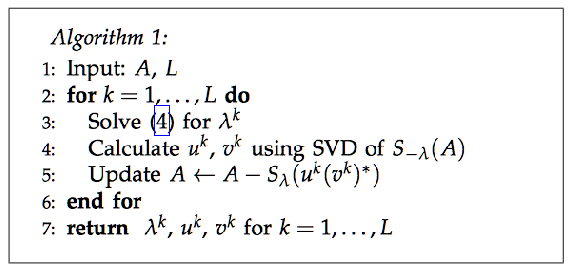

In [34]:
def show(image):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    
image_1 = cv2.imread('Algorithm1.png', -1)
show(image_1)

**In Fourier domain some useful properties can be obtained.**

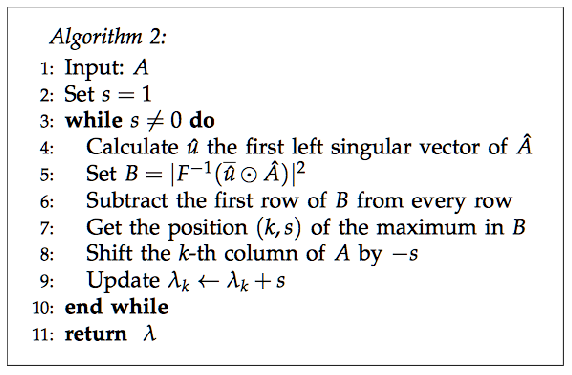

In [39]:
i2 = cv2.imread('Algorithm2.png', -1)
show(i2)


Problem (4) in Fourier domain $ \max_{\lambda \in \mathbb{Z}^N}\| \hat{A} \circ P_{-\lambda}\|_2^2 \quad(4) $ , where $ P_{-\lambda}$ is phase matrix.

Let $ u^{opt} $ be the first left singular vector of $|\hat A|$
Update for u:
$ \hat{u} \leftarrow |u^{opt}| \circ phase(\hat u) \quad (12)$

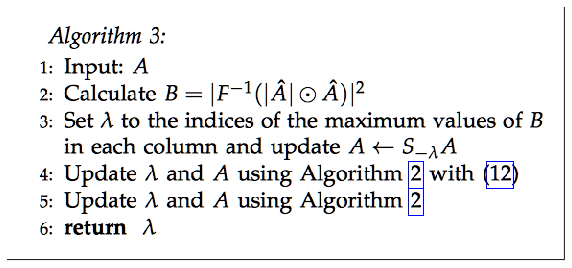

In [36]:
i3 = cv2.imread('Algorithm3.png', -1)

show(i3)

In [3]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [4]:
#hide_code_in_slideshow() 

In [5]:
@jit
def shift_operator(matrix, lambdas, column = None):
    A = matrix.copy()
    # for concrete column
    if column != None:
        A[:, column] = np.roll(A[:, column], int(lambdas))
    # for the whole set of columns(lambdas)
    else:
        for i in range(len(lambdas)):
            A[:, i] = np.roll(A[:, i], int(lambdas[i]))
            
    return A
@jit
def fourier_shift(matrix, lambdas, column = None):
    A = matrix.copy()
    # for concrete column
    if column != None:
        P = np.exp(-2 * np.pi * np.complex(0, 1)/ A.shape[0] * np.arange(A.shape[0]) * lambdas)
        A[:, column] = np.multiply(A[:, column],P)
    # for the whole set of columns(lambdas)
    else:
        P = np.exp(-2 * np.pi * complex(0, 1)/ A.shape[0] * np.arange(A.shape[0]).reshape(A.shape[0], 1) 
                   @ np.array(lambdas).reshape(1, A.shape[1]))
        
        A = np.multiply(A,P)
            
    return A
@jit
def fourier_shift(matrix, lambdas, column = None):
    A = matrix.copy()
    # for concrete column
    if column != None:
        P = np.exp(-2 * np.pi * np.complex(0, 1)/ A.shape[0] * np.arange(A.shape[0]) * lambdas)
        A[:, column] = np.multiply(A[:, column],P)
    # for the whole set of columns(lambdas)
    else:
        P = np.exp(-2 * np.pi * complex(0, 1)/ A.shape[0] * np.arange(A.shape[0]).reshape(A.shape[0], 1) 
                   @ np.array(lambdas).reshape(1, A.shape[1]))
        
        A = np.multiply(A,P)
            
    return A
@jit
def Algorithm1(A, L):
    l_k = []
    u_k = []
    v_k = []
    
    approx = np.zeros(A.shape)
    iter_gl = 0
    iter_loc = 0
    for i in range(L):
        #3. solve for lanbda_k
        shifts, iter_num_gl, iter_num_loc = Algorithm3(A)
        
        #4. calculate u, v
        #print(shifts)
        u, sigma, v = svds(shift_operator(A, -shifts).astype('complex'), k = 1)
        l_k.append(shifts)
        u_k.append(u @ sigma.reshape(1,1))
        v_k.append(v)
        
        iter_gl += iter_num_gl
        iter_loc += iter_num_loc
        approx = approx + shift_operator(u @ sigma.reshape(1, 1) @ v, shifts)
        #5. update A
        A = A - shift_operator(u @ sigma.reshape(1,1) @ v, shifts).real
    return l_k, u_k, v_k, approx, iter_gl, iter_loc
@jit
def Algorithm2(A_f): #algo2 ordinary
    iterations = 0
    shifts = np.zeros(A_f.shape[1])
    #initial guess
    U = np.zeros(A_f.shape[0]) + 1 
    # 2. Set s = 1
    s = 1
    while s != 0 and iterations < 500:
        # 4. calculate u 1st left singular vector
        U, sigma, v = svds(A_f, k = 1, v0 = U, return_singular_vectors = 'u')
        # 5. Set B
        B = np.abs(np.fft.ifft(np.conjugate(U) * A_f, axis = 0))**2
        # 6. Substract the first row of B from every row
        B = B - B[0]
        # 7. get the position (k, s) of the max in B
        s, k = np.unravel_index(B.argmax(), B.shape)
        # 8. Shift the k-th column of A by -s
        A_f = fourier_shift(A_f, -s, k)
        shifts[k] += s
        iterations += 1  

    return A_f, shifts, iterations 
@jit
def Algorithm2_modified(A_f): #algo2 modified for global max
    iterations = 0
    shifts = np.zeros(A_f.shape[1])
    U = np.zeros(A_f.shape[0]) + 1 #initial guess
    # 2. Set s = 1
    s = 1 
    # (12) calculation u_opt at the modified algo2  
    U_opt, s_opt, v_opt = svds(np.abs(A_f) , k = 1) 

    # 500. Set max_iter to use different maximum number of
    # iterations in global and local step.
    while s!= 0 and iterations < 500:
        U, S, V = svds(A_f, k = 1, v0 = U, return_singular_vectors='u')
        
        U = U * np.abs(U_opt) / np.abs(U) # change directon to find global minimum
        
        B = np.abs(np.fft.ifft(np.conjugate(U) * A_f, axis = 0))**2
        B = B - B[0]
        
        s, k = np.unravel_index(B.argmax(), B.shape) 
        A_f = fourier_shift(A_f, -s, k)
        shifts[k] += s
        iterations += 1
    
    return A_f, shifts, iterations
@jit
def Algorithm3(A):
    #1. Input A
    A_f = np.fft.fft(A, axis = 0)
    
    #2. Calculate B
    B = np.abs(np.fft.ifft(np.multiply(np.abs(A_f), A_f), axis = 0))**2 
    
    #3. Set lambda to the indices of the max values of B
    l_max = np.argmax(B, axis = 0)
    
    #global search
    A_f = fourier_shift(A_f, -l_max) 
    A_f, glob_l, glob_iter = Algorithm2_modified(A)
    l_max = l_max + glob_l 
    
    #local search 
    A_f, local_l, local_iter = Algorithm2(A_f)
    shifts =  l_max + local_l

    return shifts, glob_iter, local_iter

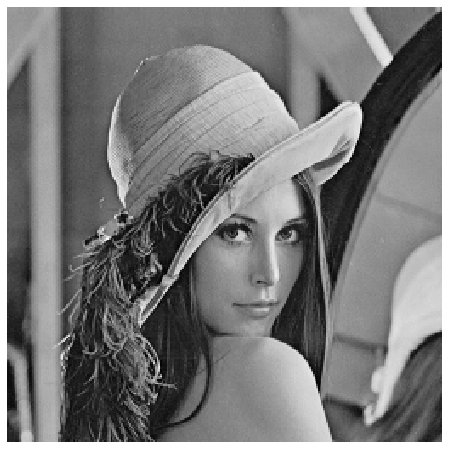

In [14]:
i3 = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE).astype(float)

show(i3)

In [7]:
from tqdm import tqdm_notebook

errors = []
global_i = []
local_i = []
for L in tqdm_notebook(range(30)):
    l, u, v, A_approx, global_it, local_it = Algorithm1(image.astype('complex'), L)
    error = np.linalg.norm(image - A_approx, ord='fro') / np.linalg.norm(image, ord='fro')
    errors.append(error)
    global_i.append(global_it)
    local_i.append(local_it)

# Obtained results


Average approximation error over "lenna.png" data.

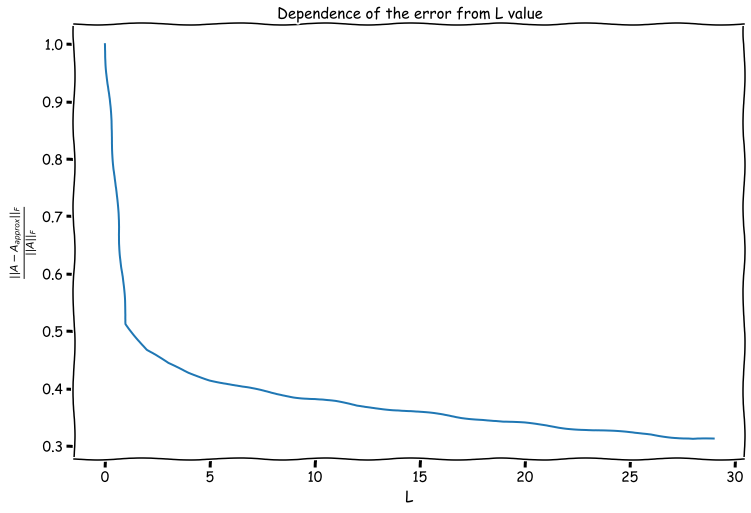

In [14]:
plt.figure(figsize=(12, 8))
plt.plot([i for i in range(30)], errors)
plt.title("Dependence of the error from L value", fontsize = 15)
plt.xlabel("L", fontsize = 15)
_ = plt.ylabel("$\\frac{||A-A_{approx}||_F}{||A||_F}$", fontsize = 15)

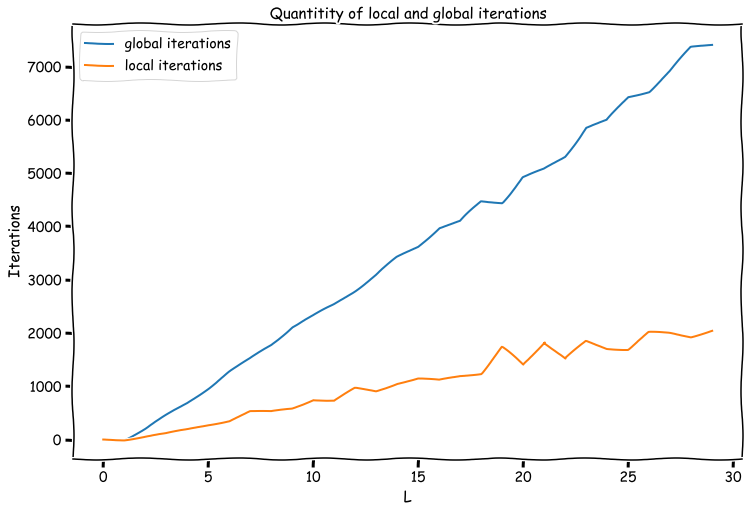

In [15]:
plt.figure(figsize=(12, 8))
plt.plot([i for i in range(30)], global_i, label = 'global iterations')
plt.plot([i for i in range(30)], local_i, label = 'local iterations')
plt.title("Quantitity of local and global iterations", fontsize = 15)
plt.xlabel("L", fontsize=15)
plt.ylabel("Iterations", fontsize=15)
plt.xkcd()
_ = plt.legend()

# Compare computed approximation for objects

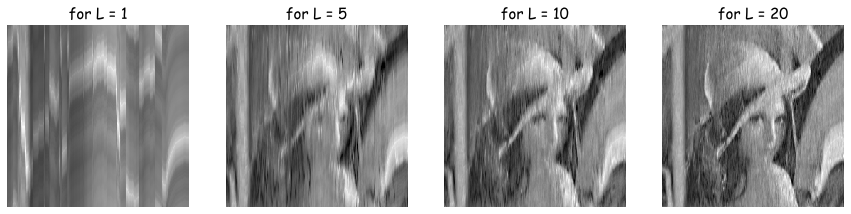

In [16]:
from project import *
print_lenas()

# Seismic wave with salt and pepper noise

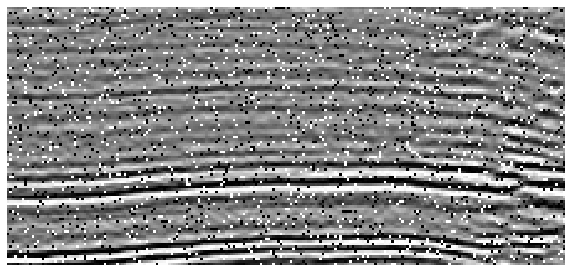

In [41]:
i3 = cv2.imread('sp_noise.jpg', cv2.IMREAD_GRAYSCALE)

show(i3)

### Object identifying

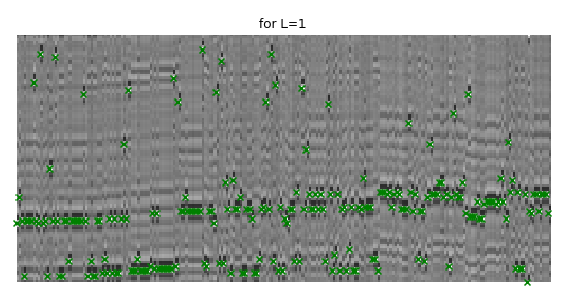

In [30]:
def show(image):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
i3 = cv2.imread('green.png', -1)

show(i3)

### Restoring our selfie

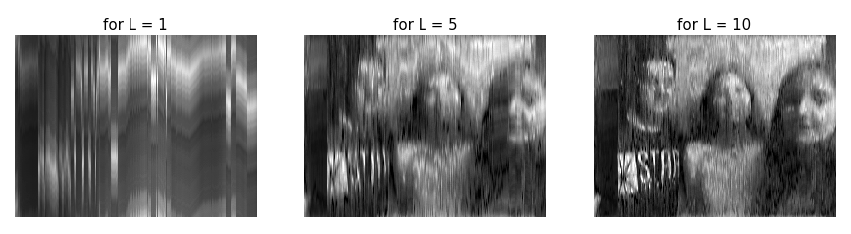

In [7]:
def show(image):
    plt.figure(figsize=(15, 10))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
i3 = cv2.imread('us3.png', cv2.IMREAD_GRAYSCALE)

show(i3)

## Conclusions:

On the base of rank-1 approximation with shifts we managed to recover the image with different quality depending on the L - number of matrices of rank - 1. 

We were able to make 'object detection'. Applied our approach to image of seismic wave we could separate the main object and the background.

Finally, we have validated this method on our own data - the photo of our team.

# <center>Thank you for your attention!<center>